# Scouting in Women's Football

This is the companion code for my blog post [**Scouting for Talent in Women's Football.**](https://medium.com/@yvonne.mcgillicuddy/scouting-for-talent-in-womens-football-6304099087a9)

First up: reading in the [Women's Football (European Leagues) data set](https://www.kaggle.com/datasets/thedevastator/uncovering-female-football-success-in-top-europe?select=all_players.csv) downloaded from _Kaggle_ and getting a sense of its size.

In [1]:
import pandas as pd
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('Data sets/all_players.csv') #Read in data set
print(df.shape) #Examining size of dataset

(1328, 111)


**111 is a lot of columns in our dataset**, and I want to look at them in a little more detail, rather than the usual abbreviated view offered by `df.head()` to see what I have available to work with.  I read Andryw Marques' blog [_"How to show all columns / rows of a Pandas Dataframe?"_](https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf) to help me to achieve this

In [2]:
pd.set_option('display.max_columns', None)
df.head()

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,Player_id,Squad_id,Sh,SoT,G_by_Sh,G_by_SoT,Dist,FK,npxG_by_Sh,G-xG,np:G-xG,Total_Cmp,Total_Att,Total_TotDist,Total_PrgDist,xA,A-xAG,KP,LastThird,PPA,CrsPA,Prog,SCA,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,Tackles_Tkl,Tackles_TklW,Tackles_Def3rd,Tackles_Mid3rd,Tackles_Att3rd,VsDribbles_Tkl,VsDribbles_Att,VsDribbles_Past,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl_plus_Int,Clr,Err,Touches_Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Dribbles_Succ,Dribbles_Att,Dribbles_Mis,Dribbles_Dis,Receiving_Rec,Receiving_Prog,Mn_by_MP,Mn_by_Start,Compl,Subs,Mn_by_Sub,unSub,TS_PPM,TS_onG,TS_onGA,TS_Diff,TS_On-Off,TS(xG)_onxG,TS(xG)_onxGA,TS(xG)_xGDiff,TS(xG)_On-Off,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp
0,Teresa Abilleira,es ESP,MF,Real Madrid,22-333,2000.0,9,7,648,3,1,3,0,0,0,0,1.2,1.2,1.1,46f75f0c,54582b93,15.0,6.0,0.20,0.50,24.2,2.0,0.08,1.8,1.8,384,478.0,7624.0,2570.0,0.8,-0.1,12.0,64.0,5.0,1.0,38.0,30.0,22.0,8.0,0.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,21.0,15.0,4.0,12.0,5.0,8.0,12.0,4.0,5.0,0.0,5.0,4.0,25.0,2.0,0.0,552.0,8.0,122.0,332.0,103.0,3.0,552.0,7.0,10.0,15.0,6.0,366.0,10.0,72.0,85.0,5,2,27.0,1.0,2.44,26.0,8.0,18.0,1.43,12.6,7.6,5.0,0.32,0,15.0,13.0,0.0,18.0,15.0,0.0,0.0,0,52.0,4.0,5.0,0.0
1,Jessica Aby,ci CIV,"FW,MF",Alavés,24-175,1998.0,10,4,383,1,0,1,0,0,3,0,1.2,1.2,0.2,72c566fe,aa11fb42,4.0,3.0,0.25,0.33,11.9,0.0,0.29,-0.2,-0.2,66,111.0,1084.0,213.0,0.2,-0.2,6.0,7.0,0.0,0.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,7.0,5.0,5.0,3.0,3.0,5.0,2.0,1.0,0.0,1.0,3.0,16.0,8.0,0.0,156.0,8.0,39.0,75.0,46.0,12.0,156.0,4.0,7.0,12.0,6.0,94.0,12.0,38.0,63.0,0,6,22.0,1.0,0.60,4.0,13.0,-9.0,-0.04,4.7,8.5,-3.8,0.69,0,19.0,8.0,2.0,3.0,7.0,0.0,0.0,0,21.0,6.0,11.0,0.0
2,Charity Adule,NaN,FW,Alhama,29-031,1993.0,1,0,14,0,0,0,0,0,0,0,0.0,0.0,0.0,67a39a11,e9fecaf2,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,14.0,NaN,0,1,14.0,NaN,0.00,0.0,0.0,0.0,1.57,0.1,0.2,-0.1,0.03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,0.0
3,Júlia Aguado,NaN,"FW,MF",Levante,22-220,2000.0,5,0,50,3,0,3,0,0,0,0,1.8,1.8,0.0,a097ef45,0f4738a8,4.0,4.0,0.75,0.75,9.3,0.0,0.45,1.2,1.2,7,11.0,69.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,5.0,13.0,6.0,18.0,0.0,3.0,1.0,0.0,16.0,5.0,10.0,NaN,0,5,10.0,5.0,2.60,4.0,0.0,4.0,6.05,2.6,0.1,2.5,3.32,0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0
4,Yolanda Aguirre,es ESP,GK,Sevilla,24-046,1998.0,4,4,360,0,0,0,0,0,0,0,0.0,0.0,0.0,150b2d3b,215d9026,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,75,111.0,2089.0,1461.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,129.0,116.0,128.0,1.0,0.0,0.0,129.0,0.0,0.0,0.0,0.0,35.0,0.0,90.0,90.0,4,0,NaN,7.0,0.75,7.0,10.0,-3.0,-1.04,5.1,7.3,-2.1,-1.31,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,1.0,1.0,0.0


As these statistics mostly relate to attacking variables in the game, a question that occurs early on is:

**can we predict goal scoring?**

...but I have a bit of exploration and cleaning to do before I can get there!  In the first instance I'm definitely going to need to clean up the _Age_ field, and I'd be wise to check the impact of nulls in my dataset.

In [3]:
years = df['Age'].str[:2] #Parsing out the first two values that refer to the age in years
df.insert(4,'Years',years) #Inserting this new column into the dataframe

#Checking for nulls
age_nulls = df['Age'].isnull().mean()
years_nulls = df['Years'].isnull().mean()
print((age_nulls*100).round(2),'% of the values in the Age column are null') 


#Confirming that no additional nulls have be caused by parsing the Age column
if age_nulls == years_nulls:
    print('There are an equal amount of nulls in the Age and Years columns')
else:
    print('There is a discrepancy between the nulls in the Age and Years columns')

0.75 % of the values in the Age column are null
There are an equal amount of nulls in the Age and Years columns


The above output shows that there are nulls in my newly created column that I will need to remove before converting it to an integer.  Thankfully it's less than 1% of values, so I'm happy to remove them, rather than impute a value that could skew later analysis.

In [4]:
df.dropna(subset=['Years'], axis=0, inplace=True)  
len(df) #drop NaN values in 'Years' and check the new dataset length

1318

In [5]:
age_years = df['Years'].astype(int) #Converting to integer
df.insert(4,'Age_Years',age_years) #inserting in dataframe
df.dtypes #checking data types

Player               object
Nation               object
Pos                  object
Squad                object
Age_Years             int32
                     ...   
OG                    int64
Recov               float64
AerialDuels_Won     float64
AerialDuels_Lost    float64
Cmp                 float64
Length: 113, dtype: object

Next up: taking a look at the completeness and range of the numerical values in the dataset...

In [6]:
df.describe()

,Age_Years,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,Sh,SoT,G_by_Sh,G_by_SoT,Dist,FK,npxG_by_Sh,G-xG,np:G-xG,Total_Cmp,Total_Att,Total_TotDist,Total_PrgDist,xA,A-xAG,KP,LastThird,PPA,CrsPA,Prog,SCA,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,Tackles_Tkl,Tackles_TklW,Tackles_Def3rd,Tackles_Mid3rd,Tackles_Att3rd,VsDribbles_Tkl,VsDribbles_Att,VsDribbles_Past,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl_plus_Int,Clr,Err,Touches_Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Dribbles_Succ,Dribbles_Att,Dribbles_Mis,Dribbles_Dis,Receiving_Rec,Receiving_Prog,Mn_by_MP,Mn_by_Start,Compl,Subs,Mn_by_Sub,unSub,TS_PPM,TS_onG,TS_onGA,TS_Diff,TS_On-Off,TS(xG)_onxG,TS(xG)_onxGA,TS(xG)_xGDiff,TS(xG)_On-Off,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1310.000000,1310.000000,1310.000000,1312.000000,1312.000000,1013.000000,763.000000,1011.000000,1310.000000,1011.000000,1310.000000,1310.000000,1318.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1312.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.00000,1310.000000,1310.000000,1310.000000,1310.000000,1312.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1197.000000,1023.000000,1318.000000,1318.000000,817.000000,1155.000000,1197.000000,1197.000000,1197.000000,1197.000000,1147.000000,1189.000000,1189.000000,1189.000000,1141.000000,1318.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1310.000000,1310.000000,1318.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,24.707891,1997.241275,6.971927,5.092564,457.800455,0.711684,0.503035,0.672231,0.039454,0.060698,0.713961,0.027314,0.620534,0.572366,0.421679,6.005335,2.183689,0.088963,0.278336,18.707319,0.200763,0.086133,0.091679,0.100916,39.015933,203.045038,2781.632824,1173.680153,0.403969,0.084427,4.199237,12.156489,3.070229,0.883206,12.407634,9.716031,6.806107,1.035115,0.432824,0.676336,0.535115,0.230534,1.163359,0.806870,0.093130,0.076336,0.087786,0.070992,0.028244,8.590076,5.623476,3.895420,3.470229,1.224427,3.297710,5.99084,2.693130,5.170992,1.360305,3.810687,6.005335,14.596183,7.288550,0.093893,252.182443,28.819847,92.919084,104.617557,57.214504,8.916794,252.119084,2.684733,5.983969,8.414504,5.288550,144.217557,12.096947,59.680869,79.443793,2.866464,1.704097,22.727050,1.721212,1.440142,8.192147,8.118630,0.073517,-0.072990,6.729437,6.712952,0.016653,-0.031157,0.015933,4.981707,4.716463,1.082317,7.429116,5.623476,0.045802,0.061069,0.027314,28.440458,3.833588,3.835115,107.782443
std,4.496057,4.487160,3.034597,3.442632,286.330316,1.367382,0.939106,1.310087,0.233732,0.320336,1.031458,0.167651,0.995819,0.908469,0.602721,7.330228,3.126952,0.140289,0.313300,6.495572,0.665762,0.063600,0.740769,0.736352,92.190119,158.644661,2569.078038,1246.854518,0.545556,0.627071,5.072356,13.428329,3.854253,1.546116,12.446504,10.198502,7.171838,2.474065,0.972340,1.186493,1.061114,0.541888,1.669627,1.213037,0.410554,0.315583,0.323399,0.287766,0.170280,8.279535,5.574815,4.618582,3.827481,1.654685,3.765865,6.10876,2.949879,4.749951,2.199371,3.732156,6.483386,13.535551,9.897524,0.342385,183.401877,60.719970,105.525508,90.987509,57.802929,12.220971,183.361506,3.702950,7.566899,8.490228,5.880847,114.617573,15.343151,26.402469,11.224995,3.106377,1.935677,11.824603,2.246551,0.899138,7.006078,6.762401,8.531053,3.20

At this stage, the data set looks in good enough shape for me to begin some preliminary analysis.  There are some null values across most columns that I'll need to address before setting up any prediction models, but again there are only a very small number in most cases (the most common deficit seems to be 8 records out of 1318), so I don't think that is going to hamper my initial observations too much.

Any column with the structure _x_**\_by_**_y_ (e.g. _G\_by\_SoT_) has a much higher volume of null values, but these represent features like _"Goals per Shot on Target"_, so there's always the potential of division by zero, and so this is to be expected.  These won't be columns that I'll use in my analysis for this reason.

Another noteworthy observation is that the max value for _MP_ (_"Matches Played"_) is very low at 11.  This tells us that for each individual player in this dataset, we're only getting a fraction of a season's games.

... but now on to...

### Q1: 
## Which team is in most need of our scouting services?
### (Who netted the fewest goals across 11 games?)

<Axes: xlabel='Goals', ylabel='Squad'>

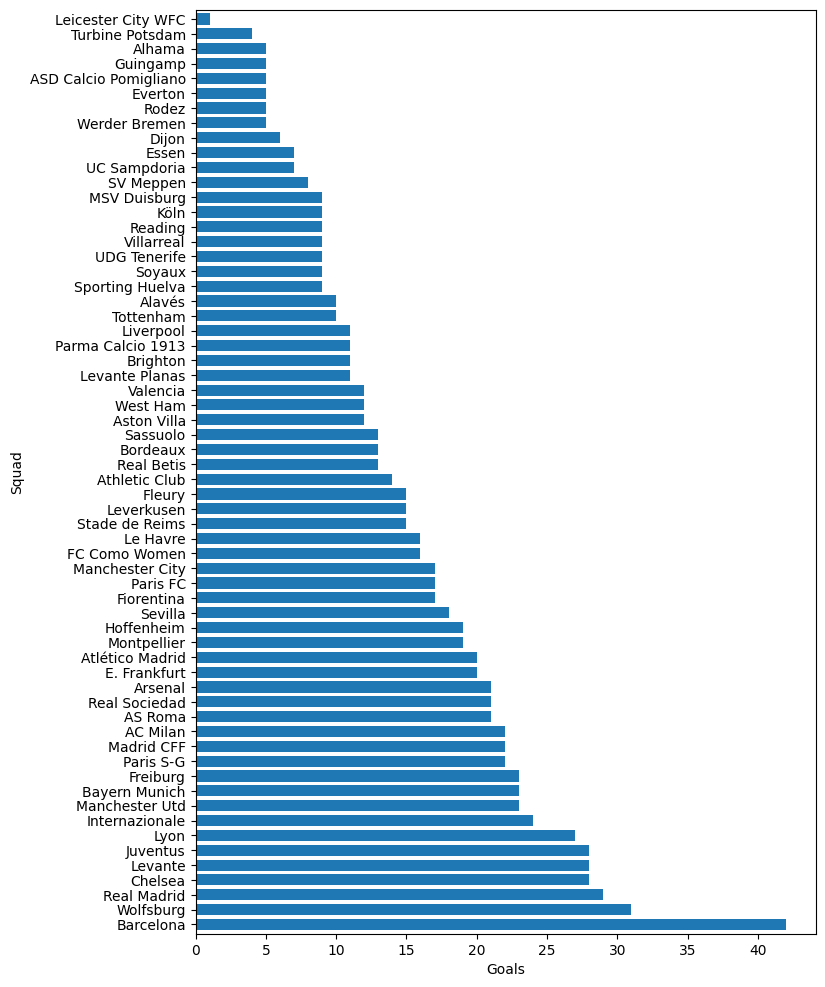

In [7]:
club = df[['Squad','Gls']]
#Grouping by squad to see total goals scored and plotting as a bar
club.groupby(['Squad']).sum()['Gls'].sort_values(ascending=False).plot.barh(figsize=(8,12), xlabel="Goals", width=.75)

### A1: 
## Leicester City WFC
Visualised as a bar chart, we can see the magnitude of difference between the leading goalscorers (Barcelona) and Leicester City WFC much more clearly, though the code in the next cell reveals the numbers to be 42 vs. _**just one goal**_ for Leicester City WFC

In [8]:
club.groupby(['Squad']).sum()['Gls'].sort_values()

Squad
Leicester City WFC        1
Turbine Potsdam           4
Guingamp                  5
Rodez                     5
ASD Calcio Pomigliano     5
                         ..
Juventus                 28
Chelsea                  28
Real Madrid              29
Wolfsburg                31
Barcelona                42
Name: Gls, Length: 62, dtype: int64

### Q2:
## Which features in the data best correlate to goalscoring?
I'm going to begin by looking over the distribution of some variables that would seem to be obviously linked to Goals (_Gls_):

* **_xG_:** Expected Goals
* **_Sh_:** Shots
* **_SoT_:** Shots on Target

array([[<Axes: title={'center': 'Gls'}>, <Axes: title={'center': 'xG'}>],
       [<Axes: title={'center': 'Sh'}>, <Axes: title={'center': 'SoT'}>]],
      dtype=object)

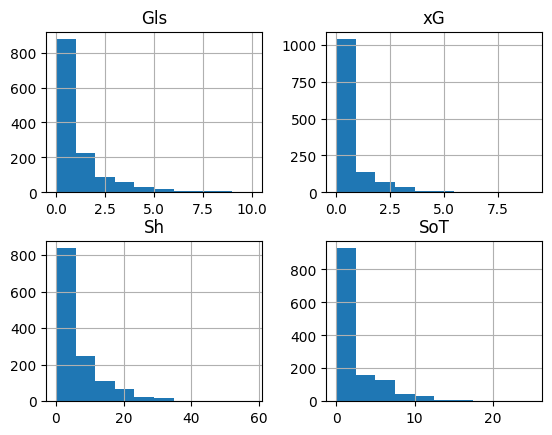

In [9]:
df[['Gls', 'xG','Sh','SoT']].hist()

The distribution of all of the features above is incredibly similar - so much so that we can easily conclude that a player that's frequently shooting towards goal is more likely to score goals.  This isn't very surprising, but we can look into it further.

There actually isn't any transparency around the dependencies in the dataset required to calculate _xG_ (expected goals), so going forward I will ignore any columns featuring _x_ for "expected" and using the available features to build my own analysis/predictions instead.

<Axes: xlabel='Goals', ylabel='Player, Club, Age'>

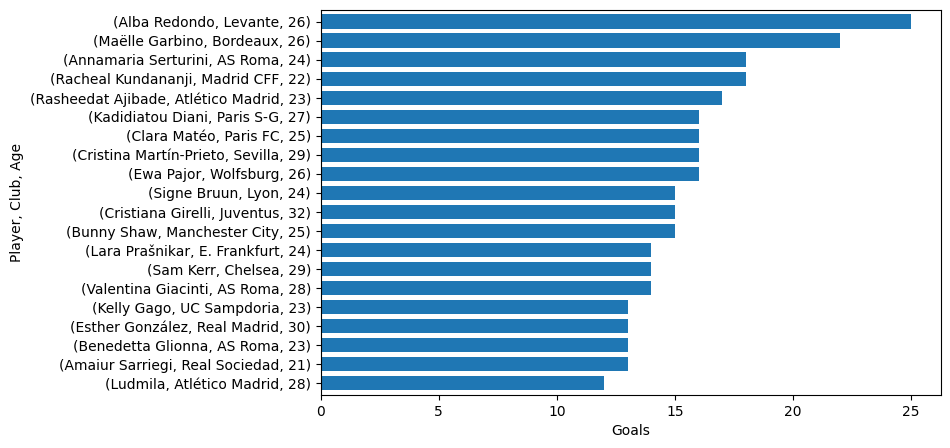

In [10]:
#visualise top 20 "shooters"
player_squad = df[['Player','Squad','SoT','Age_Years']].dropna(subset=['SoT'], axis=0).nlargest(20,['SoT'],keep='first')
player_squad.groupby(['Player','Squad','Age_Years']).sum()['SoT'].sort_values().plot.barh(figsize=(8,5), xlabel="Goals", ylabel="Player, Club, Age",width=.75)

The table below shows full details for a few players that I picked out from the bar chart above.

They are younger than the others on the list, and so might still have a lot to learn and could yet learn to convert their shots into goals without necessarily being financially unattainable.  _Benedetta Glionna_ looks interesting in this regard - with 0 goals to show for her 13 shots on target.

In [11]:
#Show full info on key targets
targets = df[df["Player"].isin(['Amaiur Sarriegi','Benedetta Glionna','Kelly Gago','Rasheedat Ajibade','Racheal Kundananji'])]
targets.head()



,Player,Nation,Pos,Squad,Age_Years,Years,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,Player_id,Squad_id,Sh,SoT,G_by_Sh,G_by_SoT,Dist,FK,npxG_by_Sh,G-xG,np:G-xG,Total_Cmp,Total_Att,Total_TotDist,Total_PrgDist,xA,A-xAG,KP,LastThird,PPA,CrsPA,Prog,SCA,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,Tackles_Tkl,Tackles_TklW,Tackles_Def3rd,Tackles_Mid3rd,Tackles_Att3rd,VsDribbles_Tkl,VsDribbles_Att,VsDribbles_Past,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl_plus_Int,Clr,Err,Touches_Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Dribbles_Succ,Dribbles_Att,Dribbles_Mis,Dribbles_Dis,Receiving_Rec,Receiving_Prog,Mn_by_MP,Mn_by_Start,Compl,Subs,Mn_by_Sub,unSub,TS_PPM,TS_onG,TS_onGA,TS_Diff,TS_On-Off,TS(xG)_onxG,TS(xG)_onxGA,TS(xG)_xGDiff,TS(xG)_On-Off,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp
5,Rasheedat Ajibade,ng NGA,FW,Atlético Madrid,23,23,23-000,1999.0,11,8,706,4,1,4,0,0,0,0,6.3,6.3,0.8,77448ed7,b56c2667,36.0,17.0,0.11,0.24,13.4,0.0,0.18,-2.3,-2.3,126,200.0,2087.0,551.0,1.1,0.2,8.0,14.0,8.0,3.0,14.0,26.0,17.0,1.0,3.0,2.0,3.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,8.0,4.0,2.0,4.0,2.0,1.0,3.0,2.0,6.0,0.0,6.0,3.0,11.0,0.0,0.0,307.0,1.0,18.0,108.0,186.0,62.0,307.0,15.0,23.0,35.0,25.0,246.0,57.0,64.0,80.0,4,3,23.0,NaN,2.09,17.0,11.0,6.0,0.13,14.6,7.2,7.3,-0.05,0,11.0,16.0,7.0,19.0,4.0,1.0,0.0,0,39.0,7.0,4.0,0.0
168,Racheal Kundananji,zm ZAM,FW,Madrid CFF,22,22,22-188,2000.0,11,7,682,9,1,9,0,0,3,0,4.0,4.0,1.8,32f48f46,89818574,30.0,18.0,0.30,0.50,16.0,0.0,0.13,5.0,5.0,93,172.0,1383.0,284.0,1.9,-0.8,13.0,8.0,8.0,0.0,13.0,36.0,22.0,0.0,7.0,3.0,1.0,3.0,8.0,3.0,0.0,3.0,0.0,1.0,1.0,11.0,8.0,1.0,6.0,4.0,3.0,6.0,3.0,5.0,0.0,5.0,7.0,18.0,5.0,0.0,304.0,7.0,25.0,113.0,181.0,60.0,304.0,14.0,29.0,39.0,13.0,183.0,66.0,62.0,80.0,4,4,30.0,NaN,2.00,17.0,13.0,4.0,-0.35,12.9,7.1,5.8,0.80,0,14.0,9.0,11.0,15.0,8.0,0.0,0.0,0,52.0,8.0,7.0,0.0
310,Amaiur Sarriegi,es ESP,"FW,MF",Real Sociedad,21,21,21-360,2000.0,11,9,749,7,1,6,1,1,0,0,5.5,4.7,1.8,924c6a21,c21f25d3,25.0,13.0,0.24,0.46,14.1,0.0,0.19,1.5,1.3,125,185.0,1917.0,392.0,1.7,-0.8,17.0,6.0,7.0,3.0,8.0,24.0,20.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,10.0,1.0,9.0,4.0,1.0,7.0,6.0,8.0,2.0,6.0,3.0,17.0,4.0,0.0,295.0,4.0,25.0,95.0,183.0,51.0,294.0,7.0,25.0,23.0,14.0,210.0,76.0,68.0,77.0,3,2,26.0,NaN,1.73,17.0,9.0,8.0,0.21,14.7,8.7,6.0,0.05,0,11.0,16.0,13.0,15.0,10.0,0.0,0.0,0,36.0,2.0,4.0,0.0
1188,Kelly Gago,fr FRA,FW,UC Sampdoria,23,23,23-337,1999.0,9,8,714,3,0,3,0,0,3,0,4.3,4.3,1.0,eb2eb4a0,58e367c3,28.0,13.0,0.11,0.23,13.7,0.0,0.15,-1.3,-1.3,0,177.0,1672.0,317.0,0.6,-1.0,13.0,2.0,2.0,1.0,6.0,27.0,15.0,0.0,5.0,5.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,15.0,10.0,2.0,7.0,6.0,1.0,4.0,3.0,7.0,1.0,6.0,10.0,25.0,15.0,0.0,295.0,18.0,53.0,110.0,137.0,47.0,295.0,14.0,20.0,28.0,18.0,194.0,44.0,NaN,NaN,0,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,12.0,5.0,7.0,9.0,10.0,0.0,0.0,0,27.0,17.0,16.0,117.0
1197,Benedetta Glionna,it ITA,"FW,DF",AS Roma,23,23,23-135,1999.0,10,5,501,0,2,0,0,0,0,0,1.6,1.6,1.5,83fb7031,02f8d026,34.0,13.0,0.00,0.00,23.2,6.0,0.05,-1.6,-1.6,0,233.0,2616.0,708.0,1.6,0.5,16.0,14.0,7.0,2.0,11.0,40.0,22.0,5.0,5.0,2.0,5.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,4.0,1.0,2.0,1.0,1.0,8.0,7.0,4.0,0.0,4.0,7.0,11.0,0.0,0.0,319.0,2.0,17.0,97.0,213.0,36.0,319.0,15.0,32.0,17.0,11.0,223.0,55.0,NaN,NaN,0,0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,10.0,2.0,32.0,4.0,0.0,0.0,0,37.0,0.0,1.0,166.0


The heatmap below picks out (along with _SoT_) some other features that correlate either strongly or _interestingly_ with goals scored.

Strongly: 
* **_Touches_AttPen_:** Touches in the attacking penalty area
* **_Touches_Att3rd_:** Touches in the attacking third.

Touches in the attacking third actually correlates more strongly with _SoT_ that with goals directly.

Interestingly:
* **_Dist_:** Distance

This one is slightly negatively correlated.

<Axes: >

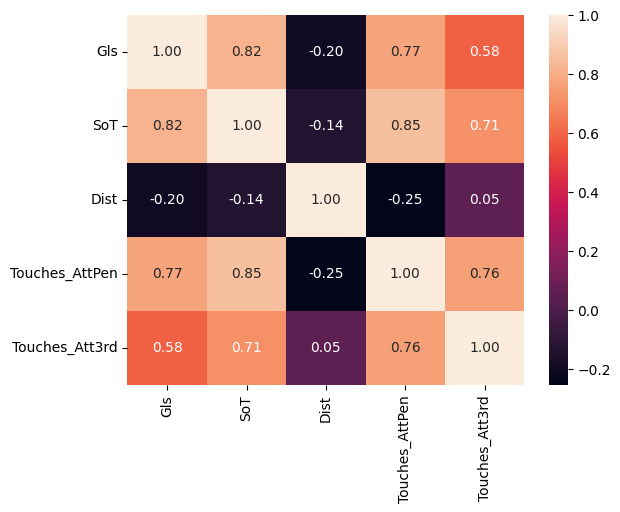

In [12]:
gls_df=df[['Gls','SoT','Dist','Touches_AttPen','Touches_Att3rd']] #choose features
sns.heatmap(gls_df.corr(), annot = True, fmt = '.2f') #correlation heatmap

## A2:
### SoT, Touches_AttPen
Honourable mention: _Touches\_Att3rd_

So in summary our ideal player is predominantly situated in the attacking third, but taking touches in the penalty area and frequently shooting at goal.  A players that runs up and down the pitch too much seems to be detrimental to goalscoring.

With our ideal player having an impact largely in the penalty area, we need to get the ball to them.

## Q3:
### Can we reliably predict assists using correlating features from the dataset?

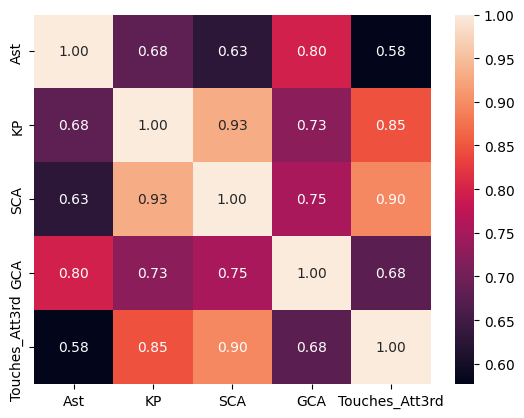

In [13]:
ast_df=df[['Ast','KP','SCA','GCA','Touches_Att3rd']] #choose features
sns.heatmap(ast_df.corr(), annot = True, fmt = '.2f'); #correlation heatmap

This heatmap focused on assists shows strong correlation for the following features:

* **_KP_:** Key Passes
* **_SCA_:** Shot creation actions
* **_GCA_:** Goal creation actions

_Touches\_Att3rd_ again has a more indirect effect; correlating more with _SCA_ more than _Ast_

As previously mentioned, there are 8 NaN values associated with each of these features that the code below will hopefully show us is the same 8 rows for all features, meaning that we can safely just drop them rather than imputing - given the small number.

In [14]:
df.dropna(subset=['KP','SCA','GCA','Touches_Att3rd'], axis=0, inplace=True)  
df.describe()

,Age_Years,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,Sh,SoT,G_by_Sh,G_by_SoT,Dist,FK,npxG_by_Sh,G-xG,np:G-xG,Total_Cmp,Total_Att,Total_TotDist,Total_PrgDist,xA,A-xAG,KP,LastThird,PPA,CrsPA,Prog,SCA,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,Tackles_Tkl,Tackles_TklW,Tackles_Def3rd,Tackles_Mid3rd,Tackles_Att3rd,VsDribbles_Tkl,VsDribbles_Att,VsDribbles_Past,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl_plus_Int,Clr,Err,Touches_Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Dribbles_Succ,Dribbles_Att,Dribbles_Mis,Dribbles_Dis,Receiving_Rec,Receiving_Prog,Mn_by_MP,Mn_by_Start,Compl,Subs,Mn_by_Sub,unSub,TS_PPM,TS_onG,TS_onGA,TS_Diff,TS_On-Off,TS(xG)_onxG,TS(xG)_onxGA,TS(xG)_xGDiff,TS(xG)_On-Off,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1011.000000,761.000000,1011.000000,1310.000000,1011.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.00000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1192.000000,1019.000000,1310.000000,1310.000000,814.000000,1147.000000,1192.000000,1192.000000,1192.000000,1192.000000,1142.000000,1184.000000,1184.000000,1184.000000,1136.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,24.724427,1997.224427,6.980153,5.101527,458.368702,0.715267,0.506107,0.675573,0.039695,0.061069,0.716794,0.026718,0.620534,0.572366,0.421679,6.005344,2.180916,0.088813,0.278633,18.707319,0.200763,0.086133,0.091679,0.100916,39.254198,203.045038,2781.632824,1173.680153,0.403969,0.084427,4.199237,12.156489,3.070229,0.883206,12.407634,9.716031,6.806107,1.035115,0.432824,0.676336,0.535115,0.230534,1.163359,0.806870,0.093130,0.076336,0.087786,0.070992,0.028244,8.590076,5.623664,3.895420,3.470229,1.224427,3.297710,5.99084,2.693130,5.170992,1.360305,3.810687,6.006107,14.596183,7.288550,0.093893,252.182443,28.819847,92.919084,104.617557,57.214504,8.916794,252.119084,2.684733,5.983969,8.414504,5.288550,144.217557,12.096947,59.732383,79.459274,2.873282,1.706107,22.762899,1.717524,1.439203,8.190436,8.138423,0.052013,-0.084081,6.728801,6.726774,0.002196,-0.032033,0.016031,4.985496,4.718321,1.083206,7.433588,5.623664,0.045802,0.061069,0.027481,28.440458,3.833588,3.835115,107.782443
std,4.500193,4.491059,3.037766,3.444363,286.642577,1.370539,0.941145,1.313129,0.234424,0.321278,1.033411,0.165986,0.995819,0.908469,0.602721,7.334888,3.128289,0.140195,0.313544,6.495572,0.665762,0.063600,0.740769,0.736352,92.420777,158.644661,2569.078038,1246.854518,0.545556,0.627071,5.072356,13.428329,3.854253,1.546116,12.446504,10.198502,7.171838,2.474065,0.972340,1.186493,1.061114,0.541888,1.669627,1.213037,0.410554,0.315583,0.323399,0.287766,0.170280,8.279535,5.579036,4.618582,3.827481,1.654685,3.765865,6.10876,2.949879,4.749951,2.199371,3.732156,6.484744,13.535551,9.897524,0.342385,183.401877,60.719970,105.525508,90.987509,57.802929,12.220971,183.361506,3.702950,7.566899,8.490228,5.880847,114.617573,15.343151,26.356524,11.216789,3.104614,1.935525,11.826505,2.246284,0.899066,7.005801,6.764241,8.539963,3.19

Finally: Specifying the features to use and fitting them to a linear regression model using scikit-learn.

In [15]:
#Choosing the features to predict assists
X = df[['KP','SCA','GCA']]
y = df['Ast']

#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

#Prediction accuracy
y_test_preds = lm_model.predict(X_test)
"The r-squared score for this model is {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for this model is 0.665458494808507 on 328 values.'

### A3:
## We can indeed predict potential for assists with a reasonable degree of accuracy.
Running the code block above shows a 67% accuracy rate (0.67 r squared) in predicting _Ast_ against _KP_, _SCA_, and _GCA_.  After some experimentation, the best results were with a test size of 25%, and the model didn't include _Touches\_Att3rd_, as this ultimately appeared to have no effect on the accuracy of the model.